In [1]:
import sys
sys.path.append('..')
from MPRA_predict.utils import *
from MPRA_predict.metrics import *

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neural_network import MLPRegressor, MLPClassifier

In [2]:
main_df = pd.read_csv('data/Sei_Siraj_features.csv')
main_df

,seq,A549,HepG2,K562,SKNSH,HCT116,is_ref,chr,pos,ref,...,A549_H3K36me3_pred_logit,A549_CTCF_pred_logit,HCT116_DNase_pred_logit,HCT116_H3K4me1_pred_logit,HCT116_H3K4me3_pred_logit,HCT116_H3K9me3_pred_logit,HCT116_H3K27me3_pred_logit,HCT116_H3K27ac_pred_logit,HCT116_H3K36me3_pred_logit,HCT116_CTCF_pred_logit
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.667516,-0.704147,0.538641,0.159069,True,chr1,14677,G,...,-8.451625,-5.178783,-4.183375,-5.234190,-4.748006,-5.354374,-5.090679,-5.958753,-7.642133,-5.942789
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.415984,0.554099,0.441904,-0.288019,False,chr1,14677,G,...,-8.504293,-5.139558,-4.202863,-5.317146,-4.801554,-5.399591,-5.143095,-5.995626,-7.684950,-5.899889
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.269937,-0.391222,0.752052,1.100437,True,chr1,63697,T,...,-9.174150,-7.003038,-4.215008,-5.436987,-6.929256,-5.848139,-5.366335,-7.071730,-9.561171,-7.614042
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.151995,-0.659023,0.204721,1.050619,False,chr1,63697,T,...,-9.129220,-7.052451,-4.185768,-5.522015,-7.128210,-5.841283,-5.615144,-7.231531,-9.487424,-7.640062
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211076,-0.007174,0.499376,0.257572,True,chr1,64764,C,...,-10.511040,-9.144752,-7.840627,-8.620074,-9.203153,-5.563872,-5.998085,-9.125849,-11.204397,-9.197061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585600,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,0.615976,1.927090,0.798263,1.035440,False,chrX,155233098,T,...,-9.411198,-5.423612,-3.711086,-4.699247,-5.555646,-6.362927,-6.117311,-6.364144,-8.306399,-6.310446
585601,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.409758,0.556338,2.843295,1.495515,True,chrX,155233794,A,...,-8.756425,-6.070607,-2.356441,-4.035868,-5.232915,-6.058248,-5.297648,-5.920075,-8.679003,-6.512767
585602,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,0.894634,-0.072647,1.973661,0.794848,False,chrX,155233794,A,...,-8.711348,-6.188205,-3.112125,-4.560548,-5.147340,-5.923994,-5.302712,-6.142751,-8.524772,-6.767405
585603,TGGTGAGTTGCTTCTGTGCACACACTTTTGTTTATGAGTGTGCATG...,NaN,0.312172,0.165634,-0.041383,0.444472,True,chrX,155234730,T,...,-8.586168,-7.417941,-5.317532,-6.502365,-8.150496,-5.235864,-5.065353,-8.504182,-8.218654,-8.253539


In [4]:
main_df['SKNSH_DNase_pred_logit']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
585600   NaN
585601   NaN
585602   NaN
585603   NaN
585604   NaN
Name: SKNSH_DNase_pred_logit, Length: 585605, dtype: float64

In [5]:
# cell_types = ['HepG2', 'K562', 'SKNSH', 'A549', 'HCT116']
# assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3', 'CTCF']

# columns = []
# for cell_type in cell_types:
#     for assay in assays:
#         main_df[f'{cell_type}_{assay}_pred'] = sigmoid(main_df[f'{cell_type}_{assay}_pred_logit'])

# # main_df = main_df.drop(columns=columns)
# main_df

In [6]:
# 60k*5 展平到 300k

cell_types = ['A549', 'HepG2', 'K562', 'SKNSH', 'HCT116']
assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3', 'CTCF']


result_df = pd.DataFrame()
# 遍历每个细胞类型
for cell_type in cell_types:
    # 提取该细胞类型的相关列
    cols = ['seq', 'is_ref', 'chr', 'pos', 'ref', 'alt'] + [cell_type] + [f"{cell_type}_{assay}_pred_logit" for assay in assays]
    # cols = ['seq', 'is_ref', 'chr', 'pos', 'ref', 'alt'] + [cell_type] + [f"{cell_type}_{assay}_pred" for assay in assays]
    temp_df = main_df[cols].copy()
    # 重命名列，使其不包含细胞类型前缀
    temp_df.columns = ['seq', 'is_ref', 'chr', 'pos', 'ref', 'alt'] + ['exp'] + assays
    # 添加一个新的列用于标注细胞类型
    temp_df['cell_type'] = cell_type
    temp_df['index'] = temp_df.index
    # 将 temp_df 添加到 result_df 中
    result_df = pd.concat([result_df, temp_df], ignore_index=True)

result_df = result_df.dropna(subset=['exp']).reset_index(drop=True)
result_df

,seq,is_ref,chr,pos,ref,alt,exp,DNase,H3K4me1,H3K4me3,H3K9me3,H3K27me3,H3K27ac,H3K36me3,CTCF,cell_type,index
0,CCCAGGTCCCCTCGCCGAGCCGCACCCGCTCTTTGCCACTGATCTC...,True,chr1,881627,G,A,0.174087,-5.069787,-6.677926,-4.772376,-7.496990,-5.175857,-6.617980,-8.960541,-6.203494,A549,143
1,CCCAGGTCCCCTCGCCGAGCCGCACCCGCTCTTTGCCACTGATCTC...,False,chr1,881627,G,A,-0.158530,-5.277000,-6.856542,-5.130377,-7.606262,-5.427920,-6.967863,-9.007917,-6.398984,A549,144
2,GGACAGATGGAGGTCACGGGAGGCCTGGGGGGCCCCTCCCACACCC...,True,chr1,884551,GAGAA,G,1.039451,-4.926292,-7.165932,-8.245449,-7.792621,-6.806868,-8.091847,-8.821148,-4.710222,A549,147
3,AGGAGTATGGACAGGACTTACAAGTTCTTACAAAGGGAAATAGAGC...,True,chr1,891059,C,T,1.404402,-3.559333,-6.580040,-5.233942,-7.777295,-5.029692,-6.400854,-8.375984,-6.433165,A549,158
4,AGGAGTATGGACAGGACTTACAAGTTCTTACAAAGGGAAATAGAGC...,False,chr1,891059,C,T,0.978974,-4.144285,-6.864729,-5.579468,-7.748142,-5.126643,-6.441888,-8.451361,-6.849373,A549,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2348046,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,False,chrX,155233098,T,C,1.035440,-3.711086,-4.699247,-5.555646,-6.362927,-6.117311,-6.364144,-8.306399,-6.310446,HCT116,585600
2348047,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,True,chrX,155233794,A,G,1.495515,-2.356441,-4.035868,-5.232915,-6.058248,-5.297648,-5.920075,-8.679003,-6.512767,HCT116,585601
2348048,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,False,chrX,155233794,A,G,0.794848,-3.112125,-4.560548,-5.147340,-5.923994,-5.302712,-6.142751,-8.524772,-6.767405,HCT116,585602
2348049,TGGTGAGTTGCTTCTGTGCACACACTTTTGTTTATGAGTGTGCATG...,True,chrX,155234730,T,C,0.444472,-5.317532,-6.502365,-8.150496,-5.235864,-5.065353,-8.504182,-8.218654,-8.253539,HCT116,585603


In [22]:
main_df = pd.read_csv('data/Sei_Siraj_features.csv')
main_df

,seq,A549,HepG2,K562,SKNSH,HCT116,is_ref,chr,pos,ref,...,A549_H3K36me3_pred_logit,A549_CTCF_pred_logit,HCT116_DNase_pred_logit,HCT116_H3K4me1_pred_logit,HCT116_H3K4me3_pred_logit,HCT116_H3K9me3_pred_logit,HCT116_H3K27me3_pred_logit,HCT116_H3K27ac_pred_logit,HCT116_H3K36me3_pred_logit,HCT116_CTCF_pred_logit
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.667516,-0.704147,0.538641,0.159069,True,chr1,14677,G,...,-8.451625,-5.178783,-4.183375,-5.234190,-4.748006,-5.354374,-5.090679,-5.958753,-7.642133,-5.942789
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.415984,0.554099,0.441904,-0.288019,False,chr1,14677,G,...,-8.504293,-5.139558,-4.202863,-5.317146,-4.801554,-5.399591,-5.143095,-5.995626,-7.684950,-5.899889
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.269937,-0.391222,0.752052,1.100437,True,chr1,63697,T,...,-9.174150,-7.003038,-4.215008,-5.436987,-6.929256,-5.848139,-5.366335,-7.071730,-9.561171,-7.614042
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.151995,-0.659023,0.204721,1.050619,False,chr1,63697,T,...,-9.129220,-7.052451,-4.185768,-5.522015,-7.128210,-5.841283,-5.615144,-7.231531,-9.487424,-7.640062
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211076,-0.007174,0.499376,0.257572,True,chr1,64764,C,...,-10.511040,-9.144752,-7.840627,-8.620074,-9.203153,-5.563872,-5.998085,-9.125849,-11.204397,-9.197061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585600,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,0.615976,1.927090,0.798263,1.035440,False,chrX,155233098,T,...,-9.411198,-5.423612,-3.711086,-4.699247,-5.555646,-6.362927,-6.117311,-6.364144,-8.306399,-6.310446
585601,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.409758,0.556338,2.843295,1.495515,True,chrX,155233794,A,...,-8.756425,-6.070607,-2.356441,-4.035868,-5.232915,-6.058248,-5.297648,-5.920075,-8.679003,-6.512767
585602,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,0.894634,-0.072647,1.973661,0.794848,False,chrX,155233794,A,...,-8.711348,-6.188205,-3.112125,-4.560548,-5.147340,-5.923994,-5.302712,-6.142751,-8.524772,-6.767405
585603,TGGTGAGTTGCTTCTGTGCACACACTTTTGTTTATGAGTGTGCATG...,NaN,0.312172,0.165634,-0.041383,0.444472,True,chrX,155234730,T,...,-8.586168,-7.417941,-5.317532,-6.502365,-8.150496,-5.235864,-5.065353,-8.504182,-8.218654,-8.253539


In [23]:
data_split_dict = {}
data_split_dict['total'] = np.ones(len(main_df), dtype=bool)
data_split_dict['chrom'] = main_df['chr'].isin([f'chr{i}' for i in range(1, 23)])
data_split_dict['train'] = main_df['chr'].isin([f'chr{i}' for i in range(3, 23)])
data_split_dict['valid'] = main_df['chr'].isin(['chr1'])
data_split_dict['test'] = main_df['chr'].isin(['chr2'])
data_split_dict['designed'] = main_df['chr'].isin(['chr0'])

cell_types = ['HepG2', 'K562', 'A549', 'HCT116']
main_df['diff'] = (main_df[cell_types].max(axis=1) - main_df[cell_types].min(axis=1)) > 1
data_split_dict['const'] = ~main_df['diff']
data_split_dict['diff']  = main_df['diff']

keys = list(data_split_dict.keys())
for k1 in keys:
    for k2 in keys:
        data_split_dict[f'{k1}_{k2}'] = data_split_dict[k1] & data_split_dict[k2]

In [24]:
# normalize between different cell types
for assay in assays:
    for cell_type in cell_types:
        x = main_df[f'{cell_type}_{assay}_pred_logit'].copy()
        condition = data_split_dict['train']
        x_mean = np.mean(x[condition])
        x_std = np.std(x[condition])
        x = (x - x_mean) / x_std
        main_df[f'{cell_type}_{assay}_pred_logit_norm'] = x

In [25]:
main_df

,seq,A549,HepG2,K562,SKNSH,HCT116,is_ref,chr,pos,ref,...,A549_H3K27me3_pred_logit_norm,HCT116_H3K27me3_pred_logit_norm,HepG2_H3K27ac_pred_logit_norm,K562_H3K27ac_pred_logit_norm,A549_H3K27ac_pred_logit_norm,HCT116_H3K27ac_pred_logit_norm,HepG2_H3K36me3_pred_logit_norm,K562_H3K36me3_pred_logit_norm,A549_H3K36me3_pred_logit_norm,HCT116_H3K36me3_pred_logit_norm
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.667516,-0.704147,0.538641,0.159069,True,chr1,14677,G,...,2.379302,1.550966,1.682440,1.838144,1.731186,1.629143,2.125114,1.939269,1.783778,1.951204
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.415984,0.554099,0.441904,-0.288019,False,chr1,14677,G,...,2.318120,1.485367,1.685125,1.845877,1.701952,1.601660,2.123270,1.900706,1.722464,1.912570
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.269937,-0.391222,0.752052,1.100437,True,chr1,63697,T,...,0.886974,1.205978,0.900330,0.155378,0.841741,0.799597,-0.074165,0.418214,0.942646,0.219652
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.151995,-0.659023,0.204721,1.050619,False,chr1,63697,T,...,0.756535,0.894590,0.766793,0.003905,0.636242,0.680491,-0.087567,0.398089,0.994951,0.286194
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211076,-0.007174,0.499376,0.257572,True,chr1,64764,C,...,0.109951,0.415334,-0.885447,-0.655151,-0.798749,-0.731420,-0.963593,-1.000352,-0.613706,-1.263034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585600,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,0.615976,1.927090,0.798263,1.035440,False,chrX,155233098,T,...,0.906083,0.266120,2.568888,1.504974,2.121055,1.326988,1.303197,1.276504,0.666684,1.351836
585601,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.409758,0.556338,2.843295,1.495515,True,chrX,155233794,A,...,0.541677,1.291941,0.860394,0.621624,1.528439,1.657971,1.236429,1.783448,1.428943,1.015634
585602,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,0.894634,-0.072647,1.973661,0.794848,False,chrX,155233794,A,...,1.065077,1.285604,0.973611,0.754139,1.359835,1.492002,1.314882,1.706010,1.481419,1.154797
585603,TGGTGAGTTGCTTCTGTGCACACACTTTTGTTTATGAGTGTGCATG...,NaN,0.312172,0.165634,-0.041383,0.444472,True,chrX,155234730,T,...,0.363448,1.582662,0.321955,0.407589,-0.092169,-0.268067,1.931104,1.811775,1.627149,1.431008


In [18]:
cell_types = ['HepG2', 'K562', 'A549', 'HCT116']
assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3']
data_splits = ['total', 'train', 'valid', 'test', 'const', 'diff', 'test_const', 'test_diff']

for i, assay in enumerate(assays):
    r_array = np.zeros(shape=(len(cell_types), len(data_splits)))
    r_array = pd.DataFrame(r_array, index=cell_types, columns=data_splits)
    for j, cell_type in enumerate(cell_types):
        for k, data_split in enumerate(data_splits):
            # print(cell_type, data_split)
            condition = data_split_dict[data_split]
            x = main_df[condition][f'{cell_type}']
            y = main_df[condition][f'{cell_type}_{assay}_pred_logit']
            r = pearson(x, y)
            r_array.loc[cell_type, data_split] = r
    print(assay, r_array)
    print()

DNase            total     train     valid      test     const      diff  \
HepG2   0.444434  0.446442  0.437585  0.426991  0.309523  0.483226   
K562    0.498697  0.501600  0.490281  0.472865  0.352071  0.505496   
A549    0.342703  0.343681  0.343723  0.331447  0.194984  0.360094   
HCT116  0.423424  0.424861  0.425175  0.403803  0.267198  0.521872   

        test_const  test_diff  
HepG2     0.288373   0.468594  
K562      0.331452   0.471823  
A549      0.183538   0.363458  
HCT116    0.255832   0.512783  

H3K4me1            total     train     valid      test     const      diff  \
HepG2   0.350906  0.352151  0.344633  0.343573  0.233622  0.374151   
K562    0.391210  0.393151  0.381860  0.378835  0.271358  0.361642   
A549    0.302663  0.301010  0.311624  0.307895  0.207573  0.258434   
HCT116  0.437049  0.437977  0.437884  0.424472  0.304876  0.506921   

        test_const  test_diff  
HepG2     0.218417   0.378243  
K562      0.258020   0.349865  
A549      0.212418   0.2827

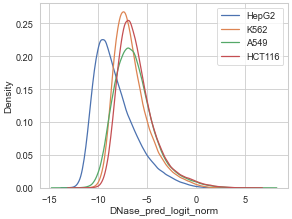

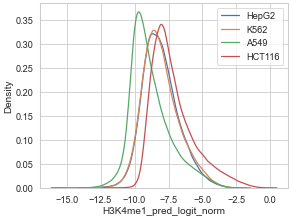

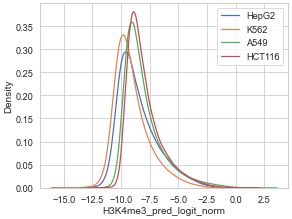

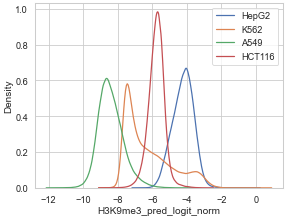

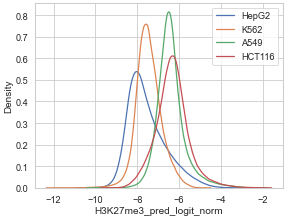

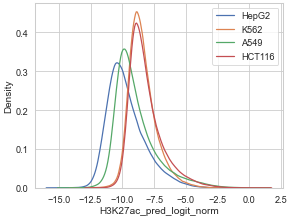

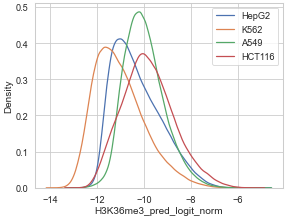

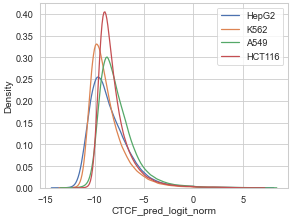

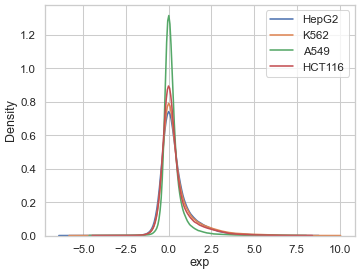

In [6]:
for assay in assays:
    plt.figure(figsize=(8, 6), dpi=40)
    for cell_type in cell_types:
        x = main_df[f'{cell_type}_{assay}_pred_logit']
        sns.kdeplot(x, label=cell_type)
    plt.xlabel(f'{assay}_pred_logit')
    plt.legend()
    plt.show()

plt.figure(figsize=(8, 6), dpi=40)
for cell_type in cell_types:
    y = main_df[cell_type]
    sns.kdeplot(y, label=cell_type)
plt.xlabel('exp')
plt.legend()
plt.show()

In [12]:
# normalize to mean = 0
for assay in assays:
    for cell_type in cell_types:
        condition = data_split_dict['train']
        x = main_df[condition][f'{cell_type}_{assay}_pred_logit']
        x_mean = np.mean(x)
        x_std = np.std(x)
        x = (x - x_mean) / x_std
        main_df[f'{cell_type}_{assay}_pred_logit_norm'] = x

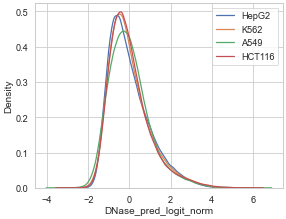

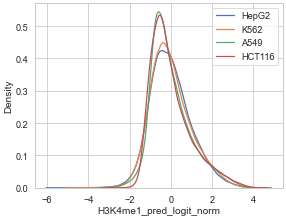

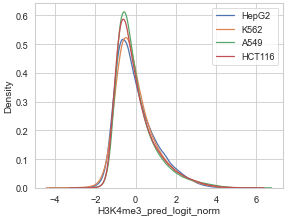

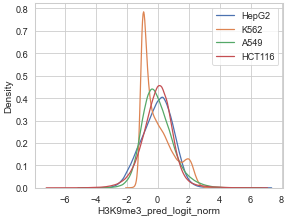

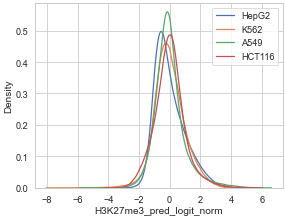

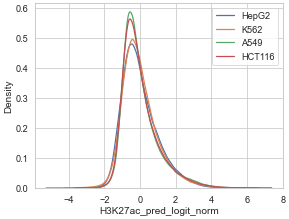

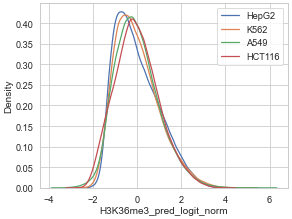

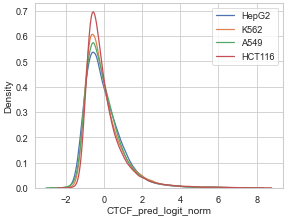

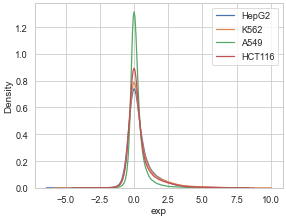

In [13]:
for assay in assays:
    plt.figure(figsize=(8, 6), dpi=40)
    for cell_type in cell_types:
        x = main_df[f'{cell_type}_{assay}_pred_logit_norm']
        sns.kdeplot(x, label=cell_type)
    plt.xlabel(f'{assay}_pred_logit_norm')
    plt.legend()
    plt.show()

plt.figure(figsize=(8, 6), dpi=40)
for cell_type in cell_types:
    y = main_df[cell_type]
    sns.kdeplot(y, label=cell_type)
plt.xlabel('exp')
plt.legend()
plt.show()

In [14]:
main_df

,seq,A549,HepG2,K562,SKNSH,HCT116,is_ref,chr,pos,ref,...,A549_H3K27ac_pred_logit_norm,HCT116_H3K27ac_pred_logit_norm,HepG2_H3K36me3_pred_logit_norm,K562_H3K36me3_pred_logit_norm,A549_H3K36me3_pred_logit_norm,HCT116_H3K36me3_pred_logit_norm,HepG2_CTCF_pred_logit_norm,K562_CTCF_pred_logit_norm,A549_CTCF_pred_logit_norm,HCT116_CTCF_pred_logit_norm
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.667516,-0.704147,0.538641,0.159069,True,chr1,14677,G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.415984,0.554099,0.441904,-0.288019,False,chr1,14677,G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.269937,-0.391222,0.752052,1.100437,True,chr1,63697,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.151995,-0.659023,0.204721,1.050619,False,chr1,63697,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211076,-0.007174,0.499376,0.257572,True,chr1,64764,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585600,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,0.615976,1.927090,0.798263,1.035440,False,chrX,155233098,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585601,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.409758,0.556338,2.843295,1.495515,True,chrX,155233794,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585602,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,0.894634,-0.072647,1.973661,0.794848,False,chrX,155233794,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585603,TGGTGAGTTGCTTCTGTGCACACACTTTTGTTTATGAGTGTGCATG...,NaN,0.312172,0.165634,-0.041383,0.444472,True,chrX,155234730,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
columns = []
for cell_type in cell_types:
    for assay in assays:
        columns.append(f'{cell_type}_{assay}_pred_logit')
a = main_df.drop(columns=columns)
a

,seq,A549,HepG2,K562,SKNSH,HCT116,is_ref,chr,pos,ref,...,A549_H3K27ac_pred_logit_norm,HCT116_H3K27ac_pred_logit_norm,HepG2_H3K36me3_pred_logit_norm,K562_H3K36me3_pred_logit_norm,A549_H3K36me3_pred_logit_norm,HCT116_H3K36me3_pred_logit_norm,HepG2_CTCF_pred_logit_norm,K562_CTCF_pred_logit_norm,A549_CTCF_pred_logit_norm,HCT116_CTCF_pred_logit_norm
0,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.667516,-0.704147,0.538641,0.159069,True,chr1,14677,G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AGTGCTGGTTCCGTCACCCCCTCCCAAGGAAGTAGGTCTGAGCAGC...,NaN,0.415984,0.554099,0.441904,-0.288019,False,chr1,14677,G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.269937,-0.391222,0.752052,1.100437,True,chr1,63697,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CATACATTTTTATTCTGGTCACTGTCCAACGACATTCCTCAAATGA...,NaN,1.151995,-0.659023,0.204721,1.050619,False,chr1,63697,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AATAGACTCTAGTACTCTGTATTATGCAAAATTTGTCTATGTTACA...,NaN,-0.211076,-0.007174,0.499376,0.257572,True,chr1,64764,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585600,ATCATTTACTGGTGACTGCCCTGCTAGGGTGTCAGCTGTCAGATCC...,NaN,0.615976,1.927090,0.798263,1.035440,False,chrX,155233098,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585601,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,1.409758,0.556338,2.843295,1.495515,True,chrX,155233794,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585602,TGGTTACTGCAGGGGCAGGGTTTTGGCAGGAAATAAACATGCACGG...,NaN,0.894634,-0.072647,1.973661,0.794848,False,chrX,155233794,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585603,TGGTGAGTTGCTTCTGTGCACACACTTTTGTTTATGAGTGTGCATG...,NaN,0.312172,0.165634,-0.041383,0.444472,True,chrX,155234730,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
a['K562_H3K27ac_pred_logit_norm']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
585600   NaN
585601   NaN
585602   NaN
585603   NaN
585604   NaN
Name: K562_H3K27ac_pred_logit_norm, Length: 585605, dtype: float64

In [8]:
cell_types = ['HepG2', 'K562', 'A549', 'HCT116']
assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3', 'CTCF']
data_splits = ['train', 'valid', 'test']

r_matrix = np.zeros((len(cell_types), len(data_splits)))
r_matrix = pd.DataFrame(r_matrix, index=cell_types, columns=data_splits)

for cell_type in cell_types:
    # train
    data_split = 'train'
    print(f'train model by {cell_type} {data_split} data')
    condition = data_split_dict[data_split]
    selected_columns = [f'{cell_type}_{assay}_pred_logit_norm' for assay in assays]
    X_train = np.array(main_df[condition][selected_columns])
    y_train = np.array(main_df[condition][f'{cell_type}'])
    X_train, y_train = remove_nan(X_train, y_train)
    if len(X_train) == 0:
        continue
    
    model = LinearRegression()
    # model = Lasso(alpha=1e-3)
    # model = MLPRegressor(hidden_layer_sizes=10, alpha=1e-3)
    model.fit(X_train, y_train)

    # valid
    for cell_type in cell_types:
        for data_split in data_splits:
            condition = data_split_dict[data_split]
            selected_columns = [f'{cell_type}_{assay}_pred_logit_norm' for assay in assays]
            X_valid = np.array(main_df[condition][selected_columns])
            y_valid = np.array(main_df[condition][f'{cell_type}'])
            X_valid, y_valid = remove_nan(X_valid, y_valid)
            if len(X_valid) == 0:
                continue
            y_pred = model.predict(X_valid)
            r = pearson(y_valid, y_pred)
            r_matrix[data_split][cell_type] = r

            # print(f"{cell_type} {data_split} Pearson's r: {r:.3f}")
    print(r_matrix)
    print()

train model by HepG2 designed data
           total     train     valid      test  designed     const      diff
HepG2   0.550120  0.577920  0.566168  0.551653  0.449539  0.417773  0.536193
K562    0.611805  0.561862  0.550316  0.531695  0.699122  0.362164  0.610134
A549    0.444034  0.446064  0.447167  0.419561  0.000000  0.275480  0.508098
HCT116  0.359705  0.361386  0.358108  0.348698  0.000000  0.205348  0.483713

train model by K562 diff data
           total     train     valid      test  designed     const      diff
HepG2   0.573985  0.521334  0.510593  0.500246  0.682090  0.370178  0.586919
K562    0.680292  0.619458  0.607765  0.589168  0.760811  0.447749  0.669582
A549    0.419318  0.421658  0.419498  0.396362  0.000000  0.240684  0.466409
HCT116  0.427267  0.428458  0.430874  0.414000  0.000000  0.272929  0.509042

train model by A549 diff data
           total     train     valid      test  designed     const      diff
HepG2   0.582950  0.549316  0.541272  0.529716  0.645029

In [9]:
# leave-one-out cross-validation
# input norm

cell_types = ['HepG2', 'K562', 'A549', 'HCT116']
assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K9me3', 'H3K27me3', 'H3K27ac', 'H3K36me3', 'CTCF']
data_splits = ['total', 'train', 'valid', 'test', 'designed', 'const', 'diff']


valid_r_matrix = np.zeros((len(cell_types), len(data_splits)))
valid_r_matrix = pd.DataFrame(r_matrix, index=cell_types, columns=data_splits)


for selected_cell_type in cell_types:
    r_matrix = np.zeros((len(cell_types), len(data_splits)))
    r_matrix = pd.DataFrame(r_matrix, index=cell_types, columns=data_splits)

    # train
    data_split = 'train'
    print(f'train model by not {selected_cell_type} data')

    X_train = []
    y_train = []
    for train_cell_type in cell_types:
        if train_cell_type == selected_cell_type:
            continue
        condition = data_split_dict[data_split]
        df = main_df[condition]

        X_columns = [f'{train_cell_type}_{assay}_pred_logit_norm' for assay in assays]
        y_column = train_cell_type
        X_train.append(df[X_columns])
        y_train.append(df[y_column])

    X_train = np.concatenate(X_train, axis=0)
    y_train = np.concatenate(y_train, axis=0)

    X_train, y_train = remove_nan(X_train, y_train)
    if len(X_train) == 0:
        continue

    model = LinearRegression()
    # model = Lasso(alpha=1e-3)
    # model = MLPRegressor(hidden_layer_sizes=10, alpha=1e-3)
    model.fit(X_train, y_train)

    # valid
    for valid_cell_type in cell_types:

        X_columns = [f'{valid_cell_type}_{assay}_pred_logit_norm' for assay in assays]
        y_column = valid_cell_type
        X = np.array(main_df[X_columns])
        y = np.array(main_df[y_column])
        # X, y = remove_nan(X, y)
        y_pred = model.predict(X)
        
        main_df[f'{valid_cell_type}_pred_by_leave_one_out_model'] = y_pred
    
        for data_split in data_splits:
            condition = data_split_dict[data_split]
            df = main_df[condition]
            y_column = valid_cell_type
            y_valid = np.array(df[y_column])
            y_pred = np.array(df[f'{valid_cell_type}_pred_by_leave_one_out_model'])

            r = pearson(y_valid, y_pred)
            r_matrix[data_split][valid_cell_type] = r
            if valid_cell_type == selected_cell_type:
                valid_r_matrix[data_split][selected_cell_type] = r
    print(r_matrix)
    print()

print('leave one out validation')
print(valid_r_matrix)

train model by not HepG2 data
           total     train     valid      test  designed     const      diff
HepG2   0.574226  0.552164  0.540733  0.529251  0.639471  0.393049  0.565736
K562    0.661686  0.599485  0.586922  0.568910  0.750757  0.418934  0.649365
A549    0.433399  0.435846  0.434919  0.407356       NaN  0.259033  0.488401
HCT116  0.477435  0.478721  0.481418  0.462044       NaN  0.317111  0.574081

train model by not K562 data
           total     train     valid      test  designed     const      diff
HepG2   0.566014  0.563250  0.553925  0.542969  0.580853  0.414414  0.539994
K562    0.631579  0.546215  0.533378  0.516598  0.749689  0.371241  0.632651
A549    0.442943  0.445261  0.444896  0.417078       NaN  0.277843  0.492370
HCT116  0.471092  0.472052  0.475197  0.459930       NaN  0.313898  0.574525

train model by not A549 data
           total     train     valid      test  designed     const      diff
HepG2   0.575993  0.559751  0.548051  0.536204  0.626160  0.399

In [34]:
# leave-one-out cross-validation
# input norm

cell_types = ['HepG2', 'K562', 'A549', 'HCT116']
assays = ['DNase', 'H3K4me1', 'H3K4me3', 'H3K27ac', 'H3K36me3', 'CTCF']
data_splits = ['train', 'valid', 'test', 'designed']
# leave-one-out cross-validation
# input norm


valid_r_matrix = np.zeros((len(cell_types), len(data_splits)))
valid_r_matrix = pd.DataFrame(r_matrix, index=cell_types, columns=data_splits)


for cell_type in cell_types:
    r_matrix = np.zeros((len(cell_types), len(data_splits)))
    r_matrix = pd.DataFrame(r_matrix, index=cell_types, columns=data_splits)

    # train
    data_split = 'train'
    print(f'train model by not {cell_type} data')

    X_train = []
    y_train = []
    for train_cell_type in cell_types:
        if train_cell_type == cell_type:
            continue
        condition = data_split_dict[data_split]
        df = main_df[condition]

        X_columns = [f'{train_cell_type}_{assay}_pred_logit_norm' for assay in assays]
        y_column = train_cell_type
        X_train.append(df[X_columns])
        y_train.append(df[y_column])

    X_train = np.concatenate(X_train, axis=0)
    y_train = np.concatenate(y_train, axis=0)

    X_train, y_train = remove_nan(X_train, y_train)
    if len(X_train) == 0:
        continue

    model = LinearRegression()
    # model = Lasso(alpha=1e-3)
    # model = MLPRegressor(hidden_layer_sizes=10, alpha=1e-3)
    model.fit(X_train, y_train)

    # valid
    for valid_cell_type in cell_types:
        for data_split in data_splits:
            condition = data_split_dict[data_split]
            df = main_df[condition]

            X_columns = [f'{valid_cell_type}_{assay}_pred_logit_norm' for assay in assays]
            y_column = valid_cell_type
            X_valid = np.array(df[X_columns])
            y_valid = np.array(df[y_column])

            X_valid, y_valid = remove_nan(X_valid, y_valid)
            if len(X_valid) == 0:
                continue
            y_pred = model.predict(X_valid)
            r = pearson(y_valid, y_pred)
            
            r_matrix[data_split][valid_cell_type] = r
            # print(f"{valid_cell_type} {data_split} Pearson's r: {r:.3f}")
            if valid_cell_type == cell_type:
                valid_r_matrix[data_split][cell_type] = r
    print(r_matrix)
    print()

print('leave one out validation')
print(valid_r_matrix)

train model by not HepG2 data
warning, 0 of 76168 values are non-nan.
warning, 0 of 76168 values are non-nan.
           train     valid      test  designed
HepG2   0.523273  0.513847  0.503616  0.594460
K562    0.575221  0.562663  0.541127  0.748951
A549    0.391589  0.390131  0.364472  0.000000
HCT116  0.468485  0.470843  0.451540  0.000000

train model by not K562 data
warning, 0 of 76168 values are non-nan.
warning, 0 of 76168 values are non-nan.
           train     valid      test  designed
HepG2   0.523809  0.514384  0.504642  0.584330
K562    0.554881  0.542217  0.522194  0.742232
A549    0.395056  0.395758  0.370235  0.000000
HCT116  0.481427  0.482752  0.467539  0.000000

train model by not A549 data
warning, 0 of 76168 values are non-nan.
warning, 0 of 76168 values are non-nan.
           train     valid      test  designed
HepG2   0.526925  0.516808  0.505628  0.562769
K562    0.574125  0.561294  0.539256  0.739839
A549    0.378375  0.374187  0.348693  0.000000
HCT116  0.46